In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Titulos=['CLASS', 'ALCOHOL', 'MALIC ACID', 'ASH', 'ALCALINITY OF ASH', 'MAGNESIUM', 'TOTAL PHENOLS', 'FLAVANOIDS', 'NONFLAVANOID PHENOLS', 'PROANTHOCYANINS', 'COLOR INTENSITY', 'HUE', 'DILUTED', 'PROLINE']
wine = pd.read_csv('C:\\RAUL\\NISSAN\\GENERAL\\USB\\FORMACION\\BootCamp - Data Scientist_Analist\\IT Academy Cibernarium - Data Science\\Data Science Itinerario\\7.- Algoritmos de aprendizaje supervisado_Clasificación\\4.- Entrega\\wineData.txt', header=None, names=Titulos)
wine.head()

,CLASS,ALCOHOL,MALIC ACID,ASH,ALCALINITY OF ASH,MAGNESIUM,TOTAL PHENOLS,FLAVANOIDS,NONFLAVANOID PHENOLS,PROANTHOCYANINS,COLOR INTENSITY,HUE,DILUTED,PROLINE
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CLASS,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
ALCOHOL,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
MALIC ACID,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
ASH,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
ALCALINITY OF ASH,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
MAGNESIUM,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
TOTAL PHENOLS,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
FLAVANOIDS,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
NONFLAVANOID PHENOLS,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
PROANTHOCYANINS,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASS                 178 non-null    int64  
 1   ALCOHOL               178 non-null    float64
 2   MALIC ACID            178 non-null    float64
 3   ASH                   178 non-null    float64
 4   ALCALINITY OF ASH     178 non-null    float64
 5   MAGNESIUM             178 non-null    int64  
 6   TOTAL PHENOLS         178 non-null    float64
 7   FLAVANOIDS            178 non-null    float64
 8   NONFLAVANOID PHENOLS  178 non-null    float64
 9   PROANTHOCYANINS       178 non-null    float64
 10  COLOR INTENSITY       178 non-null    float64
 11  HUE                   178 non-null    float64
 12  DILUTED               178 non-null    float64
 13  PROLINE               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine['CLASS'].value_counts()

2    71
1    59
3    48
Name: CLASS, dtype: int64

<AxesSubplot:xlabel='CLASS', ylabel='count'>

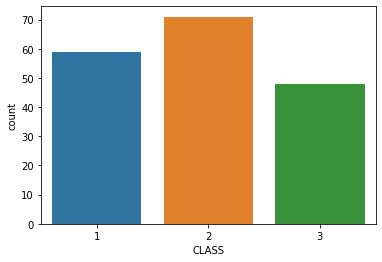

In [8]:
sns.countplot(x=wine['CLASS'])

# Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [9]:
#Separem les columnes independets de la comlumna dependent o target (CLASS) i fem l'split de Train/Test
from sklearn.model_selection import train_test_split

X = wine.drop(['CLASS'],axis=1).values
y_0 = wine['CLASS']

# Per poder treballar amb XGBoost i multiclass, el model espera que les diferents classes numériques comencin al 0,
# però el data
def reindexar(x):
    return x-1

y = y_0.apply(reindexar)

# Per poder aplicar 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Models de Classificació

In [10]:
# Decission Tree
from sklearn.tree import DecisionTreeClassifier 

class_DecTree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_test_DT = class_DecTree.predict(X_test)
y_prob_test_DT = class_DecTree.predict_proba(X_test)

In [11]:
# K-nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier 

class_KNNeig = KNeighborsClassifier().fit(X_train, y_train) # Per defecte estem agafant K=5
y_pred_test_KNN = class_KNNeig.predict(X_test)
y_prob_test_KNN = class_KNNeig.predict_proba(X_test)

In [12]:
# Support Vector Machines (SVM)
from sklearn import svm

class_SVM= svm.SVC(kernel='linear', probability=True).fit(X_train, y_train) # Linear Kernel
y_pred_test_SVM = class_SVM.predict(X_test)
y_prob_test_SVM = class_SVM.predict_proba(X_test)

In [13]:
# XGBoost
import xgboost as xgb

class_XGB = xgb.XGBClassifier().fit(X_train, y_train)
y_pred_test_XGB = class_XGB.predict(X_test)
y_prob_test_XGB = class_XGB.predict_proba(X_test)

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

class_LR = LogisticRegression(random_state=16, max_iter=5000).fit(X_train, y_train)
y_pred_test_LR = class_LR.predict(X_test)
y_prob_test_LR = class_LR.predict_proba(X_test)

# Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [72]:
# Test Set Classification Models Performance
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, recall_score, precision_score, roc_auc_score

def funcio_metriques(y_t, codi, probs, titols): #Fem una funció per poder fer-la servir als següents exercicis
    metriques_titol=['Accuracy', 'Roc_Auc', 'f1_Score (weighted)', 'Precission (weighted)', 'Recall (weighted)', 
    'f1_Score (macro)','Precission (macro)', 'Recall (macro)', 'f1_Score (micro)', 'Precission (micro)', 'Recall (micro)']
    averages=['weighted','macro', 'micro']
    metriques=np.zeros((len(metriques_titol),len(codi))) #inicialitzem l'arry amb zeros

    for j in range(len(codi)): # Omplim les columnes
            z=0
            metriques[0,j]=accuracy_score(y_t, codi[j]).round(4) # Accuracy: Millor contra més a prop del 1
            metriques[1,j]=roc_auc_score(y_t, probs[j], multi_class='ovr').round(4) # ROC_AUC: Millor contra més a prop del 1
            for i in range(len(averages)):
                z=i*3
                metriques[2+z,j]=f1_score(y_t, codi[j], average=averages[i]).round(4)
                metriques[3+z,j]=precision_score(y_t, codi[j], average=averages[i]).round(4)
                metriques[4+z,j]=recall_score(y_t, codi[j], average=averages[i]).round(4)

    metrics_df = pd.DataFrame( data = metriques, columns = titols, index=metriques_titol)
    return metrics_df

In [16]:
prediccions_codi=[y_pred_test_DT, y_pred_test_KNN, y_pred_test_SVM, y_pred_test_XGB, y_pred_test_LR]
probabilitats_codi=[y_prob_test_DT, y_prob_test_KNN, y_prob_test_SVM, y_prob_test_XGB, y_prob_test_LR]
prediccions_titol=['Decission Tree', 'K-Nearest Neighbor', 'S.Vector Machine', "XGBoost", "Logistic Regression"]

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol)

,Decission Tree,K-Nearest Neighbor,S.Vector Machine,XGBoost,Logistic Regression
Accuracy,0.9444,0.7222,0.9815,0.9630,0.9815
Roc_Auc,0.9604,0.8863,0.9986,0.9991,0.9991
f1_Score (weighted),0.9444,0.7191,0.9816,0.9627,0.9816
Precission (weighted),0.9474,0.7167,0.9828,0.9652,0.9828
Recall (weighted),0.9444,0.7222,0.9815,0.9630,0.9815
f1_Score (macro),0.9469,0.6911,0.9799,0.9632,0.9799
Precission (macro),0.9472,0.6909,0.9762,0.9595,0.9762
Recall (macro),0.9498,0.6921,0.9848,0.9697,0.9848
f1_Score (micro),0.9444,0.7222,0.9815,0.9630,0.9815
Precission (micro),0.9444,0.7222,0.9815,0.9630,0.9815


****************************************** Confussion Matrix ******************************************


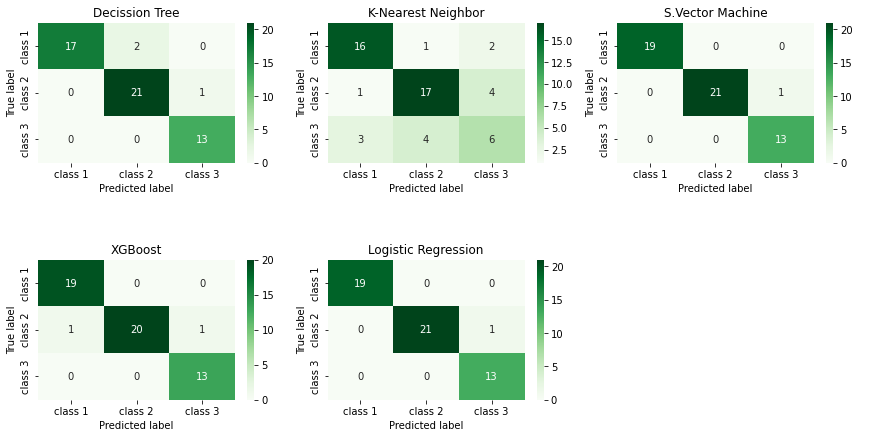

In [17]:
print("****************************************** Confussion Matrix ******************************************")
classes_names = ['class 1','class 2','class 3']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,6))
index = 0
axs = axs.flatten()

for i in range(len(prediccions_codi)):
    cm = pd.DataFrame(confusion_matrix(y_test, prediccions_codi[i]), columns=classes_names, index = classes_names)
    ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axs[index]) # Seaborn's heatmap to better visualize the confusion matrix
    ax.set(xlabel='Predicted label', ylabel='True label')
    ax.set_title(prediccions_titol[i])    
    index += 1
axs[5].axis('off') #Esborrem els exios de l'últim gràfic

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Conclusions:**

Els millors resultats segons les métriques serien pel SVM i la Regressió Logitica, que de fet treuen exactament els mateixos valor per cada indicador i la mateixa matriu de confussió. Després segueixen el XGBoost i el Decission Tree amb valors molt similars i sempre per sobre de 0.959 i 0.94 respectivament. Per últim tenim el KNN amb resultats notablement per sota de la resta de models, probablement perqué el model ha agafat el valor que K=5 que surt per defecte però no és el que dona millors resultats.

# Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció

In [18]:
# Decission Tree
class_DecTree_2 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, 
    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=0, max_leaf_nodes=4, 
     ccp_alpha=0.0001).fit(X_train, y_train)

y_pred_test_DT_2 = class_DecTree_2.predict(X_test)
y_prob_test_DT_2 = class_DecTree_2.predict_proba(X_test)

In [19]:
prediccions_codi=[y_pred_test_DT, y_pred_test_DT_2]
probabilitats_codi=[y_prob_test_DT, y_prob_test_DT_2]
prediccions_titol=['Decission Tree', 'Decission Tree_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
Decission Tree,0.9444,0.9604,0.9444,0.9474,0.9444,0.9469,0.9472,0.9498,0.9444,0.9444,0.9444
Decission Tree_2,0.9444,0.9728,0.9444,0.9474,0.9444,0.9469,0.9472,0.9498,0.9444,0.9444,0.9444


In [21]:
# K-nearest Neighbors (KNN)
# Primer fem una funció per buscar quin valor de K dona la millor Accuracy
def busca_best_K(Xte, yte, Xtr, ytr) :
    from sklearn.neighbors import KNeighborsClassifier 
    accur = []
    best_k=0
    best_accur=0

    # Calculating MAE error for K values between 1 and 39
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i).fit(Xtr, ytr)
        pred_i = knn.predict(Xte)
        acc = accuracy_score(yte, pred_i)
        accur.append(acc)
        if acc>best_accur:
            best_accur=acc
            best_k=i
    return best_k

In [23]:
class_KNNeig_2 = KNeighborsClassifier(n_neighbors=busca_best_K(X_test, y_test, X_train, y_train), weights='distance', p=1).fit(X_train, y_train) 
y_pred_test_KNN_2 = class_KNNeig_2.predict(X_test)
y_prob_test_KNN_2 = class_KNNeig_2.predict_proba(X_test)

In [24]:
prediccions_codi=[y_pred_test_KNN, y_pred_test_KNN_2]
probabilitats_codi=[y_prob_test_KNN, y_prob_test_KNN_2]
prediccions_titol=['KNN', 'KNN_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
KNN,0.7222,0.8863,0.7191,0.7167,0.7222,0.6911,0.6909,0.6921,0.7222,0.7222,0.7222
KNN_2,0.8333,0.9309,0.8365,0.8459,0.8333,0.8282,0.8286,0.8355,0.8333,0.8333,0.8333


In [23]:
# Support Vector Machines (SVM)
class_SVM_2= svm.SVC(kernel='poly', degree=3, gamma='auto', probability=True).fit(X_train, y_train) 
y_pred_test_SVM_2 = class_SVM_2.predict(X_test)
y_prob_test_SVM_2 = class_SVM_2.predict_proba(X_test)

In [24]:
prediccions_codi=[y_pred_test_SVM, y_pred_test_SVM_2]
probabilitats_codi=[y_prob_test_SVM, y_prob_test_SVM_2]
prediccions_titol=['SVM', 'SVM_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
SVM,0.9815,0.9986,0.9816,0.9828,0.9815,0.9799,0.9762,0.9848,0.9815,0.9815,0.9815
SVM_2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [25]:
# XGBoost
class_XGB_2 = xgb.XGBClassifier(booster='dart',objective= 'binary:logistic', max_depth=20, alpha=0.01, learning_rate=0.1,n_estimators=300 ).fit(X_train, y_train)
y_pred_test_XGB_2 = class_XGB_2.predict(X_test)
y_prob_test_XGB_2 = class_XGB_2.predict_proba(X_test)

In [26]:
prediccions_codi=[y_pred_test_XGB, y_pred_test_XGB_2]
probabilitats_codi=[y_prob_test_XGB, y_prob_test_XGB_2]
prediccions_titol=['XGB', 'XGB_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
XGB,0.963,0.9991,0.9627,0.9652,0.963,0.9632,0.9595,0.9697,0.963,0.963,0.963
XGB_2,0.963,0.9991,0.9627,0.9652,0.963,0.9632,0.9595,0.9697,0.963,0.963,0.963


In [27]:
# Logistic Regression
class_LR_2 = LogisticRegression(penalty='l2', dual=False, tol=0, C=1.0, fit_intercept=True, intercept_scaling=1, 
    class_weight=None, random_state=16, solver='newton-cg', max_iter=5000, multi_class='ovr', verbose=0, 
    warm_start=False, n_jobs=None, l1_ratio=0.99).fit(X_train, y_train)
y_pred_test_LR_2 = class_LR_2.predict(X_test)
y_prob_test_LR_2 = class_LR_2.predict_proba(X_test)


C:\Users\rauga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\rauga\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\rauga\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\rauga\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [28]:
prediccions_codi=[y_pred_test_LR, y_pred_test_LR_2]
probabilitats_codi=[y_prob_test_LR, y_prob_test_LR_2]
prediccions_titol=['LR', 'LR_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
LR,0.9815,0.9991,0.9816,0.9828,0.9815,0.9799,0.9762,0.9848,0.9815,0.9815,0.9815
LR_2,0.9815,0.9991,0.9816,0.9828,0.9815,0.9799,0.9762,0.9848,0.9815,0.9815,0.9815


**Conclusions:**
* Decission Tree --> En aquest cas modificant paràmetres no aconseguim cap millora.
* K-Nearest Neighbor --> Fent una iteració trobem el valor de K per optimitzar l'Accuracy. Si a més canviem el weights='distance' p=1, passem a millorar tots els paràmetres de 0.69-0.72 a 0.82-0.83. 
* Support Vector Machine --> Sorprenentment amb l'ajust de paràmetres, tots els indicadors agafen valor 1, pel que teóricament tindriem un model perfecte.
* XGBoost --> En aquest cas fent variacions amb els paràmetres no aconseguim cap millora
* Logistic Regression --> Aquí tampoc aconseguim cap millora modificant paràmetres

# Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [29]:
# Aplicarem el Grid Search per cadascun dels 5 models de clasificació que estem probant.
from sklearn.model_selection import GridSearchCV

In [30]:
# Decission Tree
parameters_DT = {
            'criterion': ['gini', 'entropy'],
            'splitter': ["best", "random"],
            'max_depth': range(1,15,1),
            'min_samples_split': range(2,400,10),
            'min_samples_leaf': range(1,60,5),
            }
DT=DecisionTreeClassifier(random_state=0)

grid_search_DT = GridSearchCV(DT, parameters_DT, scoring='accuracy', cv=10).fit(X_train, y_train)
Y_test_pred_GS_DT = grid_search_DT.predict(X_test)
Y_test_prob_GS_DT = grid_search_DT.predict_proba(X_test)

DT_best=DecisionTreeClassifier(**grid_search_DT.best_params_).fit(X_train, y_train)
Y_test_pred_GS_DT_best = DT_best.predict(X_test)
Y_test_prob_GS_DT_best = DT_best.predict_proba(X_test)

In [31]:
grid_search_DT.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [32]:
DT_best_2=DecisionTreeClassifier(criterion= 'gini',  max_depth= 2, min_samples_leaf= 1, min_samples_split= 2,
     splitter= 'random').fit(X_train, y_train)
Y_test_pred_GS_DT_best_2 = DT_best_2.predict(X_test)
Y_test_prob_GS_DT_best_2 = DT_best_2.predict_proba(X_test)

In [33]:
prediccions_codi=[y_pred_test_DT, Y_test_pred_GS_DT, Y_test_pred_GS_DT_best, Y_test_pred_GS_DT_best_2]
probabilitats_codi=[y_prob_test_DT, Y_test_prob_GS_DT, Y_test_prob_GS_DT_best, Y_test_prob_GS_DT_best_2]
prediccions_titol=['Decission Tree', 'Decission Tree_GS', 'Decission Tree_GS_best', 'Decission Tree_GS_best_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
Decission Tree,0.9444,0.9604,0.9444,0.9474,0.9444,0.9469,0.9472,0.9498,0.9444,0.9444,0.9444
Decission Tree_GS,0.9444,0.9530,0.9447,0.9461,0.9444,0.9469,0.9535,0.9417,0.9444,0.9444,0.9444
Decission Tree_GS_best,0.7963,0.8737,0.7960,0.8568,0.7963,0.8009,0.8548,0.8019,0.7963,0.7963,0.7963
Decission Tree_GS_best_2,0.7222,0.8715,0.7108,0.7822,0.7222,0.7251,0.7840,0.7488,0.7222,0.7222,0.7222


In [34]:
print("Best Score Decission Tree: ",grid_search_DT.best_score_.round(4))

Best Score Decission Tree:  0.9365


In [35]:
# K-nearest Neighbors (KNN)
parameters_KN = {
            'n_neighbors': range(1,30,1),
            'weights':['uniform', 'distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute'],
            'leaf_size': range(1,50,5)
            }
KN=KNeighborsClassifier()

grid_search_KN = GridSearchCV(KN, parameters_KN, scoring='accuracy', cv=10).fit(X_train, y_train)
Y_test_pred_GS_KN = grid_search_KN.predict(X_test)
Y_test_prob_GS_KN = grid_search_KN.predict_proba(X_test)

KN_best=KNeighborsClassifier(**grid_search_KN.best_params_).fit(X_train, y_train)
Y_test_pred_GS_KN_best = KN_best.predict(X_test)
Y_test_prob_GS_KN_best = KN_best.predict_proba(X_test)

grid_search_KN.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 1,
 'weights': 'uniform'}

In [36]:
KN_best_2=KNeighborsClassifier(algorithm= 'ball_tree',  leaf_size= 1, n_neighbors= 1, weights= 'uniform').fit(X_train, y_train)
Y_test_pred_GS_KN_best_2 = KN_best_2.predict(X_test)
Y_test_prob_GS_KN_best_2 = KN_best_2.predict_proba(X_test)

prediccions_codi=[y_pred_test_KNN, Y_test_pred_GS_KN, Y_test_pred_GS_KN_best, Y_test_pred_GS_KN_best_2]
probabilitats_codi=[y_prob_test_KNN, Y_test_prob_GS_KN, Y_test_prob_GS_KN_best, Y_test_prob_GS_KN_best_2]
prediccions_titol=['KNN', 'KNN_GS', 'KNN_GS_best', 'KNN_GS_best_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
KNN,0.7222,0.8863,0.7191,0.7167,0.7222,0.6911,0.6909,0.6921,0.7222,0.7222,0.7222
KNN_GS,0.7593,0.8054,0.7580,0.7587,0.7593,0.7358,0.7407,0.7329,0.7593,0.7593,0.7593
KNN_GS_best,0.7593,0.8054,0.7580,0.7587,0.7593,0.7358,0.7407,0.7329,0.7593,0.7593,0.7593
KNN_GS_best_2,0.7593,0.8054,0.7580,0.7587,0.7593,0.7358,0.7407,0.7329,0.7593,0.7593,0.7593


In [37]:
# Support Vector Machines (SVM)
parameters_SVM = {
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                'kernel': ['rbf', 'linear', 'poly'],
                'degree':[2,3,4],
                'probability':[True]
                 }
SVM=svm.SVC( probability=True)

grid_search_SVM = GridSearchCV(SVM, parameters_SVM, scoring='accuracy', cv=10).fit(X_train, y_train)
Y_test_pred_GS_SVM = grid_search_SVM.predict(X_test)
Y_test_prob_GS_SVM = grid_search_SVM.predict_proba(X_test)

SVM_best=svm.SVC(**grid_search_SVM.best_params_).fit(X_train, y_train)
Y_test_pred_GS_SVM_best = SVM_best.predict(X_test)
Y_test_prob_GS_SVM_best = SVM_best.predict_proba(X_test)
grid_search_SVM.best_params_

{'degree': 3, 'gamma': 0.0001, 'kernel': 'poly', 'probability': True}

In [38]:
SVM_best_2=svm.SVC(degree= 3, gamma= 0.0001, kernel= 'poly', probability= True).fit(X_train, y_train)
Y_test_pred_GS_SVM_best_2 = SVM_best_2.predict(X_test)
Y_test_prob_GS_SVM_best_2 = SVM_best_2.predict_proba(X_test)

prediccions_codi=[y_pred_test_SVM, Y_test_pred_GS_SVM, Y_test_pred_GS_SVM_best, Y_test_pred_GS_SVM_best_2]
probabilitats_codi=[y_prob_test_SVM, Y_test_prob_GS_SVM, Y_test_prob_GS_SVM_best, Y_test_prob_GS_SVM_best_2]
prediccions_titol=['SVM', 'SVM_GS', 'SVM_GS_best', 'SVM_GS_best_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
SVM,0.9815,0.9986,0.9816,0.9828,0.9815,0.9799,0.9762,0.9848,0.9815,0.9815,0.9815
SVM_GS,0.9815,0.9995,0.9816,0.9828,0.9815,0.9799,0.9762,0.9848,0.9815,0.9815,0.9815
SVM_GS_best,0.9815,1.0000,0.9816,0.9828,0.9815,0.9799,0.9762,0.9848,0.9815,0.9815,0.9815
SVM_GS_best_2,0.9815,1.0000,0.9816,0.9828,0.9815,0.9799,0.9762,0.9848,0.9815,0.9815,0.9815


In [39]:
# XGBoost
parameters_XGB = {
                    'max_depth': range (2, 10, 1),
                    'n_estimators': range(60, 220, 40),
                    'learning_rate': [0.1, 0.01, 0.05]
                 }
XGB=xgb.XGBClassifier().fit(X_train, y_train)

grid_search_XGB = GridSearchCV(XGB, parameters_XGB, scoring='accuracy', cv=10).fit(X_train, y_train)
Y_test_pred_GS_XGB = grid_search_XGB.predict(X_test)
Y_test_prob_GS_XGB = grid_search_XGB.predict_proba(X_test)

XGB_best=xgb.XGBClassifier(**grid_search_XGB.best_params_).fit(X_train, y_train)
Y_test_pred_GS_XGB_best = XGB_best.predict(X_test)
Y_test_prob_GS_XGB_best = XGB_best.predict_proba(X_test)
grid_search_XGB.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}

In [40]:
XGB_best_2=xgb.XGBClassifier(learning_rate= 0.1, max_depth= 2, n_estimators=60).fit(X_train, y_train)
Y_test_pred_GS_XGB_best_2 = XGB_best_2.predict(X_test)
Y_test_prob_GS_XGB_best_2 = XGB_best_2.predict_proba(X_test)

prediccions_codi=[y_pred_test_XGB, Y_test_pred_GS_XGB, Y_test_pred_GS_XGB_best, Y_test_pred_GS_XGB_best_2]
probabilitats_codi=[y_prob_test_XGB, Y_test_prob_GS_XGB, Y_test_prob_GS_XGB_best, Y_test_prob_GS_XGB_best_2]
prediccions_titol=['XGB', 'XGB_GS', 'XGB_GS_best', 'XGB_GS_best_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T

,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
XGB,0.963,0.9991,0.9627,0.9652,0.963,0.9632,0.9595,0.9697,0.963,0.963,0.963
XGB_GS,0.963,0.9991,0.9627,0.9652,0.963,0.9632,0.9595,0.9697,0.963,0.963,0.963
XGB_GS_best,0.963,0.9991,0.9627,0.9652,0.963,0.9632,0.9595,0.9697,0.963,0.963,0.963
XGB_GS_best_2,0.963,0.9991,0.9627,0.9652,0.963,0.9632,0.9595,0.9697,0.963,0.963,0.963


In [41]:
# Logistic Regression
parameters_LR = {
                 'max_iter': range (100, 5000, 200),
                 'penalty':['l1', 'l2', 'elasticnet', 'none'],
                 'dual':[True, False],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                 }
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


LR = LogisticRegression(random_state=16).fit(X_train, y_train)
y_pred_test_LR = class_LR.predict(X_test)
y_prob_test_LR = class_LR.predict_proba(X_test)

#random_state=16, max_iter=5000

grid_search_LR = GridSearchCV(LR, parameters_LR, scoring='accuracy', cv=10).fit(X_train, y_train)
Y_test_pred_GS_LR = grid_search_LR.predict(X_test)
Y_test_prob_GS_LR = grid_search_LR.predict_proba(X_test)

LR_best = LogisticRegression(**grid_search_LR.best_params_)
LR_best.fit(X_train, y_train)
Y_test_pred_GS_LR_best = LR_best.predict(X_test)
Y_test_prob_GS_LR_best = LR_best.predict_proba(X_test)

grid_search_LR.best_params_

{'dual': False, 'max_iter': 1100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [42]:
LR_best_2=LogisticRegression(dual= False, max_iter= 1100, penalty= 'l2', solver= 'lbfgs').fit(X_train, y_train)
Y_test_pred_GS_LR_best_2 = LR_best_2.predict(X_test)
Y_test_prob_GS_LR_best_2 = LR_best_2.predict_proba(X_test)

prediccions_codi=[y_pred_test_LR, Y_test_pred_GS_LR, Y_test_pred_GS_LR_best, Y_test_pred_GS_LR_best_2]
probabilitats_codi=[y_prob_test_LR, Y_test_prob_GS_LR, Y_test_prob_GS_LR_best, Y_test_prob_GS_LR_best_2]
prediccions_titol=['LR', 'LR_GS', 'LR_GS_best', 'LR_GS_best_2']

funcio_metriques(y_test, prediccions_codi, probabilitats_codi, prediccions_titol).T


,Accuracy,Roc_Auc,f1_Score (weighted),Precission (weighted),Recall (weighted),f1_Score (macro),Precission (macro),Recall (macro),f1_Score (micro),Precission (micro),Recall (micro)
LR,0.9815,0.9991,0.9816,0.9828,0.9815,0.9799,0.9762,0.9848,0.9815,0.9815,0.9815
LR_GS,0.9444,0.9991,0.9444,0.9474,0.9444,0.9469,0.9472,0.9498,0.9444,0.9444,0.9444
LR_GS_best,0.9444,0.9991,0.9444,0.9474,0.9444,0.9469,0.9472,0.9498,0.9444,0.9444,0.9444
LR_GS_best_2,0.9444,0.9991,0.9444,0.9474,0.9444,0.9469,0.9472,0.9498,0.9444,0.9444,0.9444


**Conclusions:**

* Decission Tree --> Aplicant el GridSearch aconseguim millores pràcticament imperceptibles.
* K-Nearest Neighbor -->  Els resultats milloren respecte als valors inicials, però empitjoren respecte als del Exercici 3, això pot ser degut al overfitting inicial que es corretgeix en part amb el cross-validation.
* Support Vector Machine --> En aquest cas, no aconseguim práticament cap millora i no arribem al resultat del Exercici 3, probablement pel mateix motiu que el KNN. 
* XGBoost --> En aquest model no hi ha cap millora, respecte a la primera versió obtenint els matiexos resultats de totes les mètriques.
* Logistic Regression --> d'una manera semblant a d'altres models, aplicant el cross-validation, empitjorem una mica els resultats.

# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

* Fem servir el RandomForest per detectar els camps més importants del dataframe i fer els models de clasificació només amb aquests camps.

In [40]:
from sklearn.ensemble import RandomForestClassifier

feature_names = Titulos[1:]
forest = RandomForestClassifier(random_state=0).fit(X_train, y_train)

In [41]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


Text(0, 0.5, 'Mean decrease in impurity')

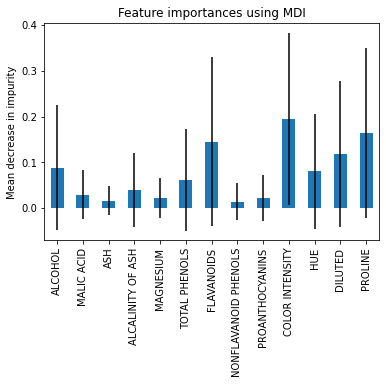

In [42]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

In [43]:
# Ens quedem amb aquells camps amb valors per sobre del 0.10
forest_importances[forest_importances>0.1].sort_values(ascending=False)

COLOR INTENSITY    0.194819
PROLINE            0.164348
FLAVANOIDS         0.145228
DILUTED            0.119075
dtype: float64

In [44]:
# Reduïm les columnes d'X per deixar-les només amb les columnes seleccionades (amb Y no cal fer res)
wine_redu=wine[['CLASS', 'COLOR INTENSITY','PROLINE', 'FLAVANOIDS', 'DILUTED']]

* Fem detecció i eliminació d'Ouliers

In [46]:
Q1 = wine_redu.quantile(0.25)
Q3 = wine_redu.quantile(0.75)
IQR = Q3 - Q1

wine_redu = wine_redu[~((wine_redu < (Q1 - 1.5 * IQR)) |(wine_redu > (Q3 + 1.5 * IQR))).any(axis=1)]

* Apliquem escalat de les dades

In [48]:
from sklearn.preprocessing import StandardScaler

X_redu= wine_redu.drop(['CLASS'],axis=1).values
y_redu = wine_redu['CLASS'].apply(reindexar)

# Apliquem l'split 
X_train_r, X_test_r, y_train_redu, y_test_redu = train_test_split(X_redu, y_redu, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train_r)

X_train_redu = scaler.transform(X_train_r)
X_test_redu = scaler.transform(X_test_r)

* Finalment tornem a treure la taula d'indicadors per cada model de clasificació

In [73]:
# Decission Tree
class_DecTree_redu = DecisionTreeClassifier(random_state=0).fit(X_train_redu, y_train_redu)
y_pred_test_DT_redu = class_DecTree_redu.predict(X_test_redu)
y_prob_test_DT_redu = class_DecTree_redu.predict_proba(X_test_redu)

In [74]:
# K-nearest Neighbors (KNN)
class_KNNeig_redu = KNeighborsClassifier().fit(X_train_redu, y_train_redu) 
y_pred_test_KNN_redu = class_KNNeig_redu.predict(X_test_redu)
y_prob_test_KNN_redu = class_KNNeig_redu.predict_proba(X_test_redu)

In [75]:
busca_best_K(X_test_redu, y_test_redu, X_train_redu, y_train_redu)

5

In [76]:
# Support Vector Machines (SVM)
class_SVM_redu= svm.SVC(kernel='linear', probability=True).fit(X_train_redu, y_train_redu) # Linear Kernel
y_pred_test_SVM_redu = class_SVM_redu.predict(X_test_redu)
y_prob_test_SVM_redu = class_SVM_redu.predict_proba(X_test_redu)

In [77]:
# XGBoost
class_XBG_redu = xgb.XGBClassifier().fit(X_train_redu, y_train_redu)
y_pred_test_XGB_redu = class_XBG_redu.predict(X_test_redu)
y_prob_test_XGB_redu = class_XBG_redu.predict_proba(X_test_redu)

In [78]:
# Logistic Regression
class_LR_redu = LogisticRegression(random_state=16, max_iter=5000).fit(X_train_redu, y_train_redu)
y_pred_test_LR_redu = class_LR_redu.predict(X_test_redu)
y_prob_test_LR_redu = class_LR_redu.predict_proba(X_test_redu)

In [79]:
prediccions_codi_redu=[y_pred_test_DT_redu, y_pred_test_KNN_redu, y_pred_test_SVM_redu, y_pred_test_XGB_redu, y_pred_test_LR_redu]
probabilitats_codi_redu=[y_prob_test_DT_redu, y_prob_test_KNN_redu, y_prob_test_SVM_redu, y_prob_test_XGB_redu, y_prob_test_LR_redu]
prediccions_titol_redu=['Decission Tree', 'K-Nearest Neighbor', 'S.Vector Machine', "XGBoost", "Logistic Regression"]

funcio_metriques(y_test_redu, prediccions_codi_redu, probabilitats_codi_redu, prediccions_titol_redu)

,Decission Tree,K-Nearest Neighbor,S.Vector Machine,XGBoost,Logistic Regression
Accuracy,0.9434,0.9811,0.9434,0.9811,0.9623
Roc_Auc,0.9559,0.9981,0.9964,0.9967,0.9969
f1_Score (weighted),0.9438,0.9813,0.9431,0.9813,0.9624
Precission (weighted),0.9451,0.9825,0.9438,0.9825,0.9636
Recall (weighted),0.9434,0.9811,0.9434,0.9811,0.9623
f1_Score (macro),0.9421,0.9795,0.9457,0.9795,0.9628
Precission (macro),0.9441,0.9762,0.9420,0.9762,0.9603
Recall (macro),0.9409,0.9841,0.9507,0.9841,0.9666
f1_Score (micro),0.9434,0.9811,0.9434,0.9811,0.9623
Precission (micro),0.9434,0.9811,0.9434,0.9811,0.9623


**Conclusions:**

Decission Tree -->  es manté pràcticament igual que l'excercici 2
K-Nearest Neighbor -->  millora molt comparat amb l'exercici 2, entre d'altres coses per qué el valor óptim de K és el 5 que és el valor per defecte del model
Support Vector Machine i Logistic Regression --> baixen una mica respecte als valors de l'exercici 2 (approx. 0.04 i 0.02 respecitivament)
XGBoost -->  En aquest model millorem aproximadament 0.02